In [1]:
import pandas as pd
import math
from keras import models
from keras import layers
from keras import regularizers
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import max_error
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.metrics import mean_squared_error
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
from google.colab import files 
uploaded = files.upload()

Saving vyborki.xlsx to vyborki.xlsx


In [3]:
df = pd.read_excel('vyborki.xlsx')
df.head()

# fill empty values ​​with the last number
df=df.fillna(222)
df = df.replace(222,np.nan).ffill()

# average for each hour
df.iloc[144:1009, :] = df.iloc[144:1009, :].rolling(13).mean().reindex(df.index[::13])

# average for every two hours
df.iloc[1009:1512, :] = df.iloc[1009:1512, :].rolling(25).mean().reindex(df.index[::25])
df = pd.concat([df[x].dropna().reset_index(drop=True) for x in df], axis=1)

In [4]:
# day
fet = df['d']
dataset = fet.values
met=dataset[:]

data = []
data.append(met[:])

date = np.array(data)

In [5]:
# train data
x_train = np.array(df.iloc[0:144, 0:45]).transpose()
y_train = np.array(df.iloc[139:, 0:45]).transpose()

# test data
x_test= np.array(df.iloc[0:144, 45:60]).transpose()
y_test = np.array(df.iloc[139:, 45:60]).transpose()

In [6]:
np.random.seed(42)
train_data = x_train
train_targets = y_train

In [7]:
# ANN model
def build_model(optimizer='adam'):
  tf.random.set_seed(42)
  model = models.Sequential()
  model.add(layers.Dense(128, activation='relu',  input_shape=(train_data.shape[1],)))
  model.add(layers.Dense(128, activation='relu'))
  model.add(layers.Dense(64, activation='relu'))
  model.add(Dropout(0.1))
  model.add(layers.Dense(90, activation='linear'))
  model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])
  return model

In [9]:
# model training
model3=build_model(tf.keras.optimizers.Adam(learning_rate=0.0004, beta_1=0.9, beta_2=0.999, amsgrad=False))
history3 = model3.fit(x_train, y_train, epochs=686, validation_data=(x_test, y_test),batch_size=1, verbose=2)

Epoch 1/686
45/45 - 1s - loss: 0.0017 - mae: 0.0257 - val_loss: 9.9766e-04 - val_mae: 0.0184 - 607ms/epoch - 13ms/step
Epoch 2/686
45/45 - 0s - loss: 8.9716e-04 - mae: 0.0162 - val_loss: 5.2585e-04 - val_mae: 0.0145 - 99ms/epoch - 2ms/step
Epoch 3/686
45/45 - 0s - loss: 6.2660e-04 - mae: 0.0137 - val_loss: 4.0302e-04 - val_mae: 0.0129 - 111ms/epoch - 2ms/step
Epoch 4/686
45/45 - 0s - loss: 4.6636e-04 - mae: 0.0121 - val_loss: 3.1296e-04 - val_mae: 0.0123 - 117ms/epoch - 3ms/step
Epoch 5/686
45/45 - 0s - loss: 5.1838e-04 - mae: 0.0129 - val_loss: 5.0318e-04 - val_mae: 0.0143 - 121ms/epoch - 3ms/step
Epoch 6/686
45/45 - 0s - loss: 4.0362e-04 - mae: 0.0117 - val_loss: 2.8262e-04 - val_mae: 0.0114 - 116ms/epoch - 3ms/step
Epoch 7/686
45/45 - 0s - loss: 2.7166e-04 - mae: 0.0102 - val_loss: 2.8578e-04 - val_mae: 0.0109 - 106ms/epoch - 2ms/step
Epoch 8/686
45/45 - 0s - loss: 2.5359e-04 - mae: 0.0093 - val_loss: 2.3740e-04 - val_mae: 0.0107 - 112ms/epoch - 2ms/step
Epoch 9/686
45/45 - 0s - los

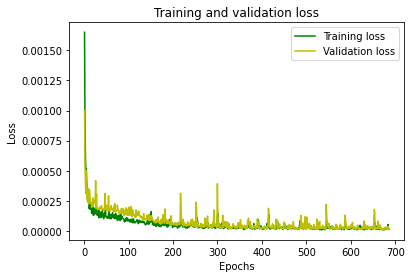

In [70]:
# change mse by epoch
plt.clf()
loss = history3.history['loss']
val_loss = history3.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'g', label='Training loss')
plt.plot(epochs, val_loss, 'y', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

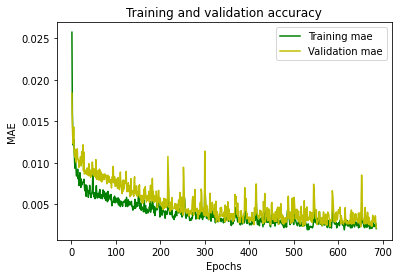

In [71]:
# change mae by epoch
plt.clf()
acc = history3.history['mae']
val_acc = history3.history['val_mae']
plt.plot(epochs, acc, 'g', label='Training mae')
plt.plot(epochs, val_acc, 'y', label='Validation mae')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

In [12]:
# minimum mae by epoch
np.array(val_acc).min()

0.0021814864594489336

In [13]:
# epoch where minumum mae
i, = np.where(np.array(val_acc) == np.array(val_acc).min())

In [14]:
i

array([685])

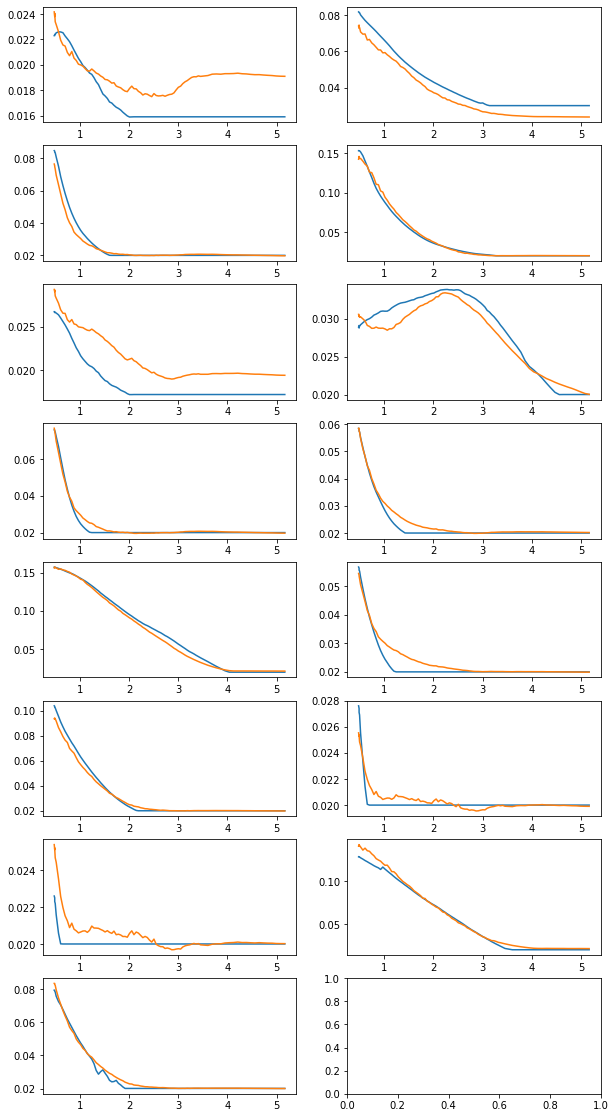

In [26]:
# blue = real voltage, orange - predicted voltage
pred = model3(x_test)
t = pred
t1 = y_test
fig, ax = plt.subplots(8, 2, figsize=(10, 20))
axs = [ax[i, j] for i in range(8) for j in range(2)]
for i in range(0, 15):
    axs[i].plot(date[0, 139:], t1[i])
    axs[i].plot(date[0, 139:], t[i])

In [27]:
# mean absolute error (mae) for test data
mae_er = []
for i in range(0, 15):
  mae_er.append(mean_absolute_error(t1[i], t[i]))

In [28]:
# mean absolute error (mae) for test data
mae_er

[0.0019403241743236432,
 0.005788762140862295,
 0.0022022573675584555,
 0.002521582436992072,
 0.00278342699535887,
 0.001287082703743384,
 0.0010314606445849398,
 0.0011609870329549986,
 0.003818874422196808,
 0.0018361070996548447,
 0.0023495470087319392,
 0.00042899881635211204,
 0.0006049269367079371,
 0.0036427452755814728,
 0.0013251984548441403]

In [29]:
# mean mae
np.mean(mae_er)

0.0021814854340298606

In [30]:
# max absolute error (max)
max_er = []
for i in range(0, 15):
  max_er.append(max_error(t1[i], t[i]))

In [31]:
# max absolute error (max)
max_er

[0.0034401332944631463,
 0.009563961822252914,
 0.011439710298868339,
 0.01085534808635713,
 0.004719078567853311,
 0.0027741800908857653,
 0.0050543560832738525,
 0.004752655802323237,
 0.009463046804758027,
 0.007474666014313704,
 0.010326712870597846,
 0.002115948104858399,
 0.002944699982725653,
 0.014370282011765712,
 0.0057970110361392595]

In [32]:
# mean max
np.mean(max_er)

0.007006119391429086

In [37]:
# mean absolute percentage error (mape)
S = 0
mape_er = []
for j in range(0, y_test.shape[0]):
  for i in range(0, y_test.shape[1]):
    S += abs(y_test[j, i]-pred[j, i])/abs(pred[j, i])
  mape_er.append(S/y_test.shape[1])
  S = 0

In [38]:
# mape
mape_er

[<tf.Tensor: shape=(), dtype=float32, numpy=0.10248603>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.16229254>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.054835077>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.039251946>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.12834848>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.044626787>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.03770647>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.0468965>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.072638996>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.06783649>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.046622768>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.019755237>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.027404202>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.054881413>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.039867833>]

In [69]:
# mean mape
np.mean(mape_er)

0.06303004

In [41]:
# simpson's method for integrating amperage
def Q_Simpson(x, f):
  Q=[]
  SUM_Q = 0
  for i in range(2, f.shape[0]):
    SUM_Q+=(x[i]-x[i-2])*(f[i-2]+4*f[i-1]+f[i])/6
    Q.append(SUM_Q)
  return Q

In [45]:
# minutes
fet = df['min']
dataset = fet.values
met=dataset[:]

minut = []
minut.append(met[:])

minut = np.array(minut)

In [46]:
# seconds
second = minut*60

In [56]:
# charge received at predicted voltage
Q_pred = np.array([Q_Simpson(second[0], np.concatenate([x_test[i], t[i][5:]])/100) for i in range(0, 15)])

# charge received at real voltage
Q_real = np.array([Q_Simpson(second[0], np.concatenate([x_test[i], t1[i][5:]])/100) for i in range(0, 15)])

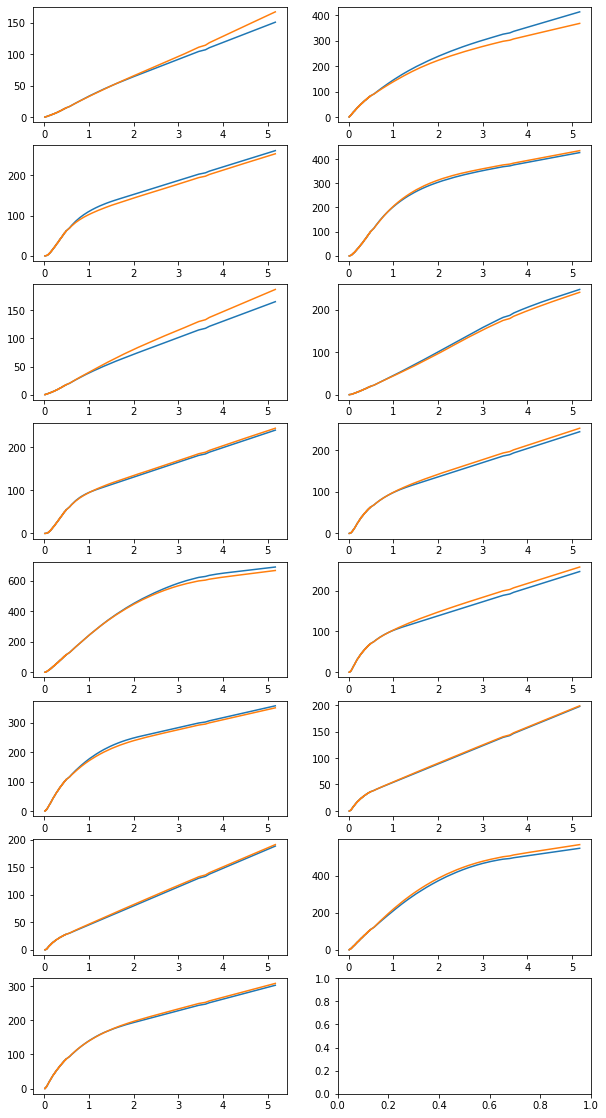

In [57]:
# blue = real charge, orange - predicted charge
fig, ax = plt.subplots(8, 2, figsize=(10, 20))
axs = [ax[i, j] for i in range(8) for j in range(2)]
for i in range(0, 15):
    axs[i].plot(date[0, 2:], Q_real[i])
    axs[i].plot(date[0, 2:], Q_pred[i])

In [58]:
# mean absolute error (mae)
TEST_MAE_ERROR = []
for i in range(0, 15):
  TEST_MAE_ERROR.append(mean_absolute_error(Q_real[i, 144:], Q_pred[i, 144:]))

In [59]:
# mean absolute error (mae)
TEST_MAE_ERROR 

[4.396183703862011,
 20.680724952375083,
 8.299705050359647,
 6.77019645081319,
 10.425513176299996,
 4.593463558117222,
 3.187186283796705,
 5.597426935172532,
 11.523780245258541,
 8.28169193486358,
 7.214611459936142,
 1.189838918023861,
 2.2505785505143194,
 12.684285253263837,
 3.498979364837241]

In [60]:
# mean mae
np.array(TEST_MAE_ERROR).mean()

7.372944389166261

In [61]:
# max absolute error (max)
TEST_MAE_ERROR = []
for i in range(0, 15):
  TEST_MAE_ERROR.append(max_error(Q_real[i, 144:], Q_pred[i, 144:]))

In [62]:
# max absolute error (max)
TEST_MAE_ERROR

[16.451316179819997,
 45.369880397372015,
 9.806838083586058,
 9.168016820537503,
 21.79193214429455,
 8.104702384048409,
 4.562784902824859,
 8.40036372725831,
 25.916449045150216,
 11.125399273173826,
 9.715776890558317,
 1.6388658049621654,
 2.807917542396737,
 19.8375281002875,
 5.476368396283533]

In [63]:
# mean max
np.array(TEST_MAE_ERROR).mean()

13.344942646170265

In [64]:
# mean absolute percentage error (mape)
S = 0
E = []
for j in range(0, Q_real.shape[0]):
  for i in range(144, Q_real.shape[1]):
    S += abs(Q_real[j, i]-Q_pred[j, i])/abs(Q_pred[j, i])
  E.append(S/  Q_real.shape[1])
  S = 0

In [65]:
# mean absolute percentage error (mape)
E

[0.014283074349029558,
 0.02846306973705124,
 0.019936189082290626,
 0.007447924446747146,
 0.03438067541586507,
 0.012618025250438529,
 0.007456770590579497,
 0.011911149628070224,
 0.007315065547310974,
 0.017227210156646806,
 0.010786582857968824,
 0.004250874625282116,
 0.008703002402279194,
 0.011682883581338229,
 0.005475846573990109]

In [66]:
# mean mape
np.array(E).mean()

0.013462556282992543

In [67]:
# max mape
S = 0
E = []
D = []
for j in range(0, Q_real.shape[0]):
  for i in range(x_train.shape[1], Q_real.shape[1]):
    D.append(abs(Q_real[j, i]-Q_pred[j, i])/abs(Q_pred[j, i]))

In [68]:
# max mape
np.array(D).max()

0.12323110390643773